## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction of Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
working_dir = '/content/drive/MyDrive/Hotel Bookings.csv'

df=pd.read_csv(working_dir)

In [ ]:
df.shape

(119390, 32)

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
print(f'we have total {df.shape[0]} rows and {df.shape[1]} columns.')

we have total 119390 rows and 32 columns.


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include = object)

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [ ]:
df1 = df.copy()

In [ ]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

##**Data Description:**

**hotel** :Resort Hotel or City Hotel

**is_canceled** : Value indicating if the booking was canceled (1) or not (0)

**lead_time** : Number of days that elapsed between the entering date of the booking and the arrival date

**arrival_date_year** : Year of arrival date

**arrival_date_month** : Month of arrival date

**arrival_date_week_number **: Week number of year for arrival date

**arrival_date_day_of_month** : Day of arrival date

**stays_in_weekend_nights** : Number of weekend nights

**stays_in_week_nights** : Number of week nights.

**adults** : Number of adults

**children** : Number of children

**babies** : Number of babies

**meal **: Type of meal booked.

**country** : Country of origin.

**market_segment** : Market segment designation. (TA/TO)

**distribution_channel** : Booking distribution channel.(T/A/TO)

**is_repeated_guest** : is a repeated guest (1) or not (0)

**previous_cancellations** : Number of previous bookings that were cancelled by the
customer prior to the current booking

**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

**reserved_room_type** : Code of room type reserved.

**assigned_room_type** : Code for the type of room assigned to the booking.

**booking_changes** : Number of changes made to the booking from the moment the
booking was entered on the PMS until the moment of check-in or cancellation

**deposit_type** : No Deposit, Non Refund , Refundable.

**agent** : ID of the travel agency that made the booking

**company** : ID of the company/entity that made the booking.

**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer.

**customer_type** : type of customer. Contract,Group,transient,Transient party.

**adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

**required_car_parking_spaces** : Number of car parking spaces required by the
customer

**total_of_special_requests** : Number of special requests made by the customer (e.g. twin bed or high floor)

**reservation_status** : Reservation last status.

# **Data Cleaning**

In [ ]:
# Checking for duplicated rows
df1.duplicated().value_counts()
# True = Duplicated Rows
# False = Not Duplicated Rows

False    87396
True     31994
dtype: int64

Text(0.5, 1.0, 'Counts For duplicated Rows')

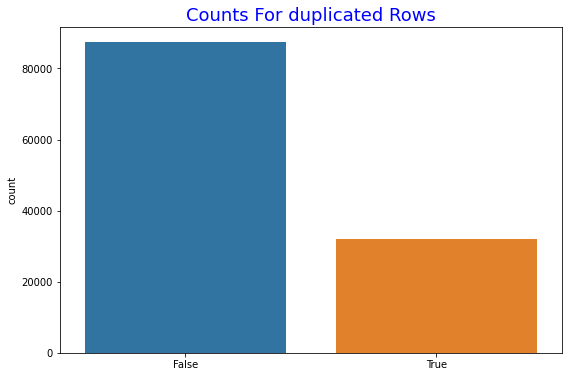

In [ ]:
# use Count plot for Visualization of duplicated rows
plt.figure(figsize = (9, 6))
sns.countplot(x=(df1.duplicated()))
plt.title('Counts For duplicated Rows', size = 18, color = 'blue')

we have 32001 duplicated rows in our dataset. So we will drop duplicared rows from our dataset

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1.shape

(87396, 32)

Handling Missing Values

In [ ]:
df1.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index' : 'Columns', 0 : 'Null Values'})

,Columns,Null Values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


In [ ]:
# handling missing values of columns : company, agent, country, children

Text(0.5, 1.0, 'Missing Values Places in Columns')

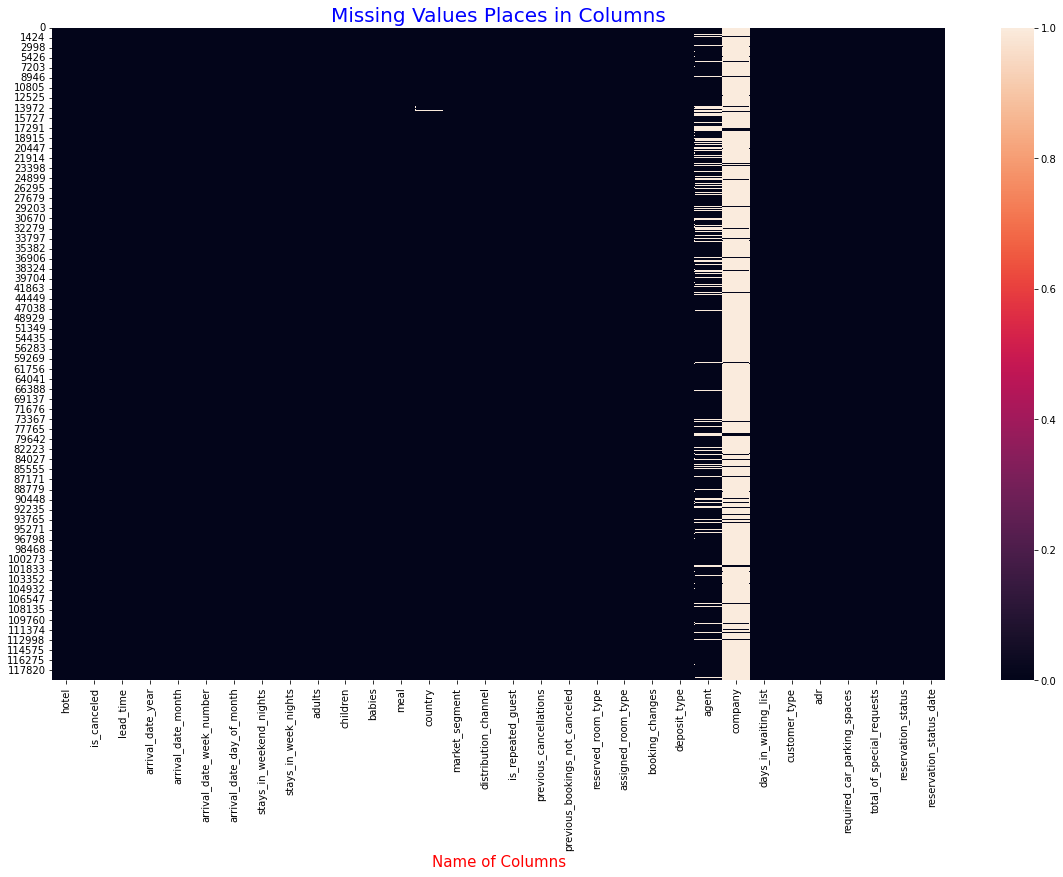

In [ ]:
plt.figure(figsize = (20, 12))
sns.heatmap(df1.isnull())
plt.xlabel('Name of Columns', color='red', size = 15)
plt.title('Missing Values Places in Columns', color = 'blue', size=20)

Droping Company data because more than 90% data is missing

In [ ]:
df1.drop('company', inplace=True, axis=1)

In [ ]:
df1.shape

(87396, 31)

In [ ]:
#Replacing NA Values with 'others' in 'country' column

df1['country'].fillna('others', inplace=True)

In [ ]:
#Filling missing value with 0 in Column children and agent

df1['children'].fillna(0, inplace=True)
df1['agent'].fillna(0, inplace=True)

In [ ]:
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [ ]:
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index' : 'Columns', 0 : 'Null Values'})

,Columns,Null Values
0,hotel,0
1,is_repeated_guest,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


# **EDA (Exploratory Data Analysis)**

# **Univariate Analysis**

## **1. What type of hotel has more bookings?**

Text(0.5, 1.0, 'Most Preffered Hotel')

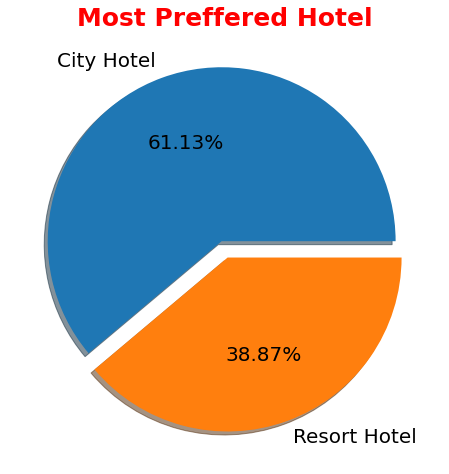

In [ ]:
data = df1['hotel'].value_counts().tolist()
labels = df1['hotel'].value_counts().index.tolist()

plt.figure(figsize=(8, 8))
plt.pie(x= data, explode=[0.05, 0.05], labels= labels, autopct = '%1.2f%%', shadow=True, textprops={'fontsize': 20})
plt.title('Most Preffered Hotel', fontsize = 25, color='red', fontweight='bold')

#### **Observation**
#### City Hotel is most preffered hotel by people beacuse it has 61.13% bookings.

## **2. Cancellation rates in two types of hotel**

In [ ]:
df1['is_canceled'].value_counts()

0    63371
1    24025
Name: is_canceled, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

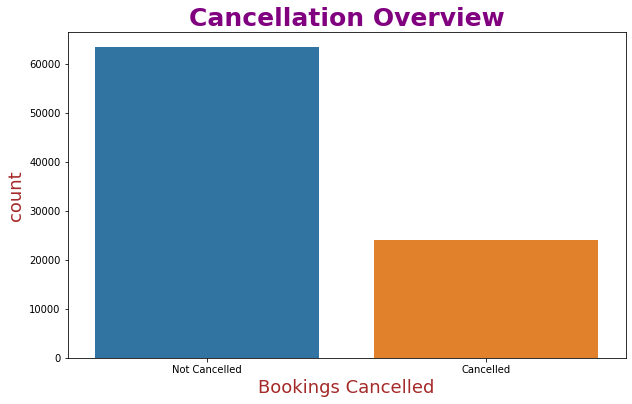

In [ ]:
# Booking Cancelled = 1
# Booking Not Calcelled = 0 

df1['is_canceled'] = df1.is_canceled.replace([1,0], ['Cancelled', 'Not Cancelled'])
canceled_df= df1['is_canceled']

plt.figure(figsize=(10,6))
sns.countplot(canceled_df)
plt.title('Cancellation Overview', fontsize=25, color='purple', fontweight='bold')
plt.xlabel('Bookings Cancelled', fontsize=18, color='brown')
plt.ylabel('count', fontsize=18, color='brown')

#### **Observation**
#### Booking Cancellation Status are 
#### Not Cancelled : 63364
#### Cancelled : 24025



## **3. What is Percentage of Cancellation**

Text(0, 0.5, 'is_canceled')

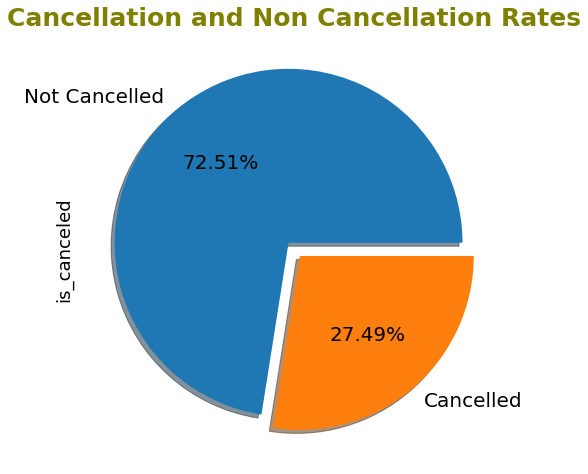

In [ ]:
plt.figure(figsize=(8, 8))
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct = '%1.2f%%', shadow=True, textprops={'fontsize': 20})
plt.title('Cancellation and Non Cancellation Rates', fontsize = 25, color='olive', fontweight='bold')
plt.ylabel('is_canceled', fontsize=18)

#### **Observation :**

####27.49 % of the bookings were cancelled.

## **4. Which agent made most bookings?**

In [ ]:
# Returning highest bookings made by agents

booking_count_by_agent = df1['agent'].value_counts().reset_index()
booking_count_by_agent.sort_values(by='agent', ascending=False)

#Top 10 bookings made by agents
top_ten_agents = booking_count_by_agent[:10]
top_ten_agents.rename(columns={'index' : 'agent', 'agent': 'most_bookings'}, inplace=True)
top_ten_agents

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,agent,most_bookings
0,9.0,28759
1,240.0,13028
2,0.0,12193
3,14.0,3349
4,7.0,3300
5,250.0,2779
6,241.0,1644
7,28.0,1502
8,8.0,1383
9,1.0,1232


Text(0, 0.5, 'Number of Bookings')

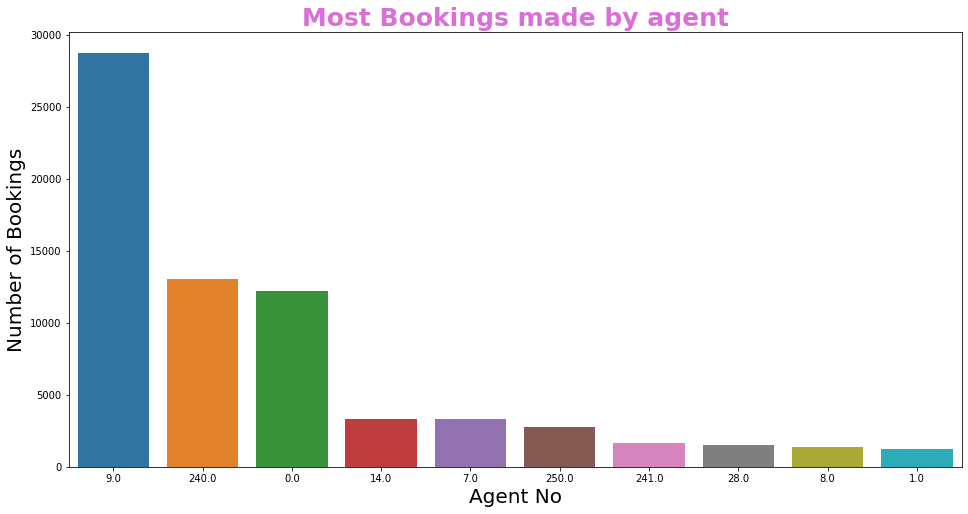

In [ ]:
# Visualization top 10 bookings made by agents

plt.figure(figsize=(16, 8))
sns.barplot(x = top_ten_agents['agent'], y = top_ten_agents['most_bookings'], order = top_ten_agents['agent'])
plt.title('Most Bookings made by agent', fontsize = 25, color='orchid', fontweight='bold')
plt.xlabel('Agent No', fontsize=20)
plt.ylabel('Number of Bookings', fontsize=20)

####  **Observation**
#### Agent ID no: 9.0 made most of the bookings

## **5. What is the Percentage of repeated guests?**

Text(0, 0.5, 'is_repeated_guest')

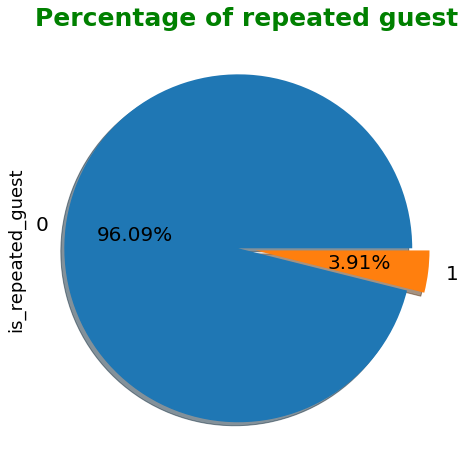

In [ ]:
plt.figure(figsize=(8, 8))
df1['is_repeated_guest'].value_counts().plot.pie(explode=[0.05, 0.05], autopct = '%1.2f%%', shadow=True, textprops={'fontsize': 20})
plt.title('Percentage of repeated guest', fontsize = 25, color='green', fontweight='bold')
plt.ylabel('is_repeated_guest', fontsize=18)

#### **Observation:**
####Repeated guests are very few which only 3.91 %.
#### Guests management should take feedbacks from guests and try to imporve the services.

## **6. What is the percentage distribution of "Customer Type"?**

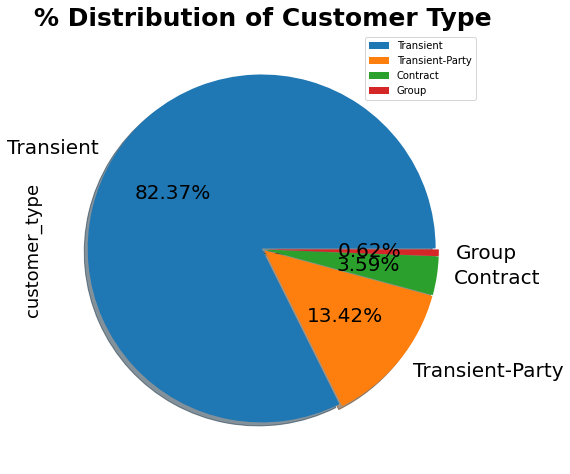

In [ ]:
plt.figure(figsize=(8, 8))
df1['customer_type'].value_counts().plot.pie(explode=[0.01]*4, autopct = '%1.2f%%', shadow=True, textprops={'fontsize': 20})
plt.title('% Distribution of Customer Type',fontsize = 25, fontweight='bold')
plt.ylabel('customer_type', fontsize=18)
plt.legend()

**1. Contract**

When the booking has an allotment or other type of contract associated to it

**2. Group**

When the booking is associated to a group

**3. Transient**

When the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**

When the booking is transient, but is associated to at least other transient booking

#### **Observation:**
####Transient customer type is more whcih is 82.37 %. percentage of Booking associated by the Group is vey low.

## **7. What is the percentage distribution of required car parking spaces?**

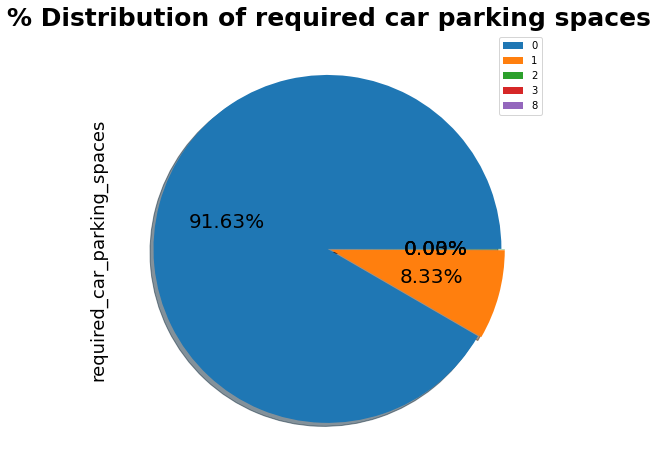

In [ ]:
plt.figure(figsize=(8, 8))
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.01]*5, autopct = '%1.2f%%', shadow=True, textprops={'fontsize': 20}, labels=None)
labels = df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces',fontsize = 25, fontweight='bold')
plt.ylabel('required_car_parking_spaces', fontsize=18)
plt.legend(labels=labels)

#### **Observation**
####91.63 % guests did not required the parking space. only 8.33 % guests required only 1 parking space.

## **8. Which type of food is mostly preffered by the guest?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

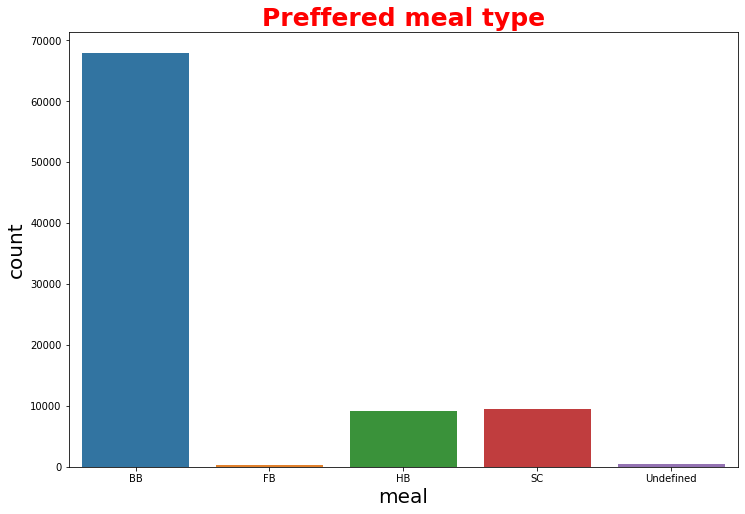

In [ ]:
plt.figure(figsize=(12, 8))
meal = df1['meal']
sns.countplot(meal)
plt.title('Preffered meal type', fontsize=25, fontweight = 'bold', color='red')
plt.xlabel('meal', fontsize=20)
plt.ylabel('count', fontsize=20)

**Types of meal in hotels:**

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering) 
#### **Observation** 
#### So the most preferred meal type by the guests is BB( Bed and Breakfast) 
#### HB- (Half Board) and SC- (Self Catering) are equally preferred.

## **9. What is Percentage distribution of Deposite type ?**

Text(0, 0.5, 'deposit_type')

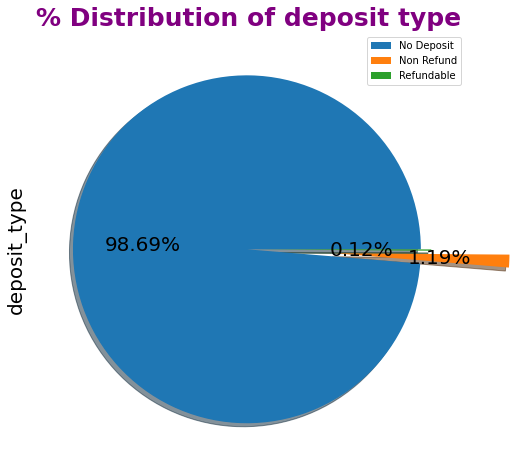

In [ ]:
plt.figure(figsize=(16, 8))
df1['deposit_type'].value_counts().plot.pie(explode=[0.01, 0.5, 0.05], autopct = '%1.2f%%', shadow=True, textprops={'fontsize': 20}, labels=None)
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(labels= labels)
plt.title('% Distribution of deposit type', fontsize = 25,fontweight = 'bold', color='purple')
plt.ylabel('deposit_type', fontsize=20)

#### **Observation**
####98.69 % of the guests prefer "No deposit" type of deposit.

## **10. What is the percentage of booking changes made by the customer?**

Text(0, 0.5, 'Percentage(%)')

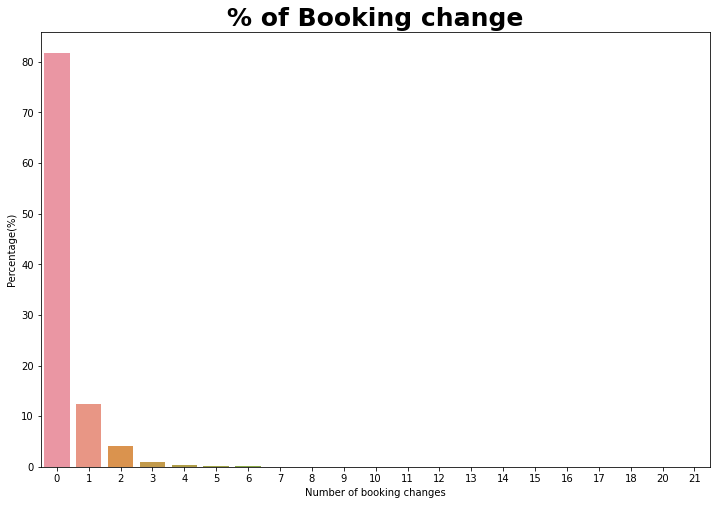

In [ ]:
booking_changes = df1['booking_changes'].value_counts().reset_index().rename(columns={'index':'number_of_booking_changes', 'booking_changes':'counts'})
#booking_changes['counts']*100/df1.shape[0]
plt.figure(figsize=(12, 8))
sns.barplot(x=booking_changes['number_of_booking_changes'], y=booking_changes['counts']*100/df1.shape[0])
plt.title("% of Booking change", fontsize = 25, fontweight = 'bold')
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

0 = 0 changes made in the bookings

1 = 1 changes made in the bookings

2 = 2 changes made in the bookings

3 = 3 changes made in the bookings

#### **Observation**
#### 80% -83% of the bookings were not changed by the customer.

## **11. From which country the most guests are coming?**

In [ ]:
df1['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'others', 'ROU', 'NOR',
       'OMN', 'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA',
       'NLD', 'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN',
       'MOZ', 'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR',
       'UKR', 'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU',
       'TUR', 'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA',
       'KOR', 'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN',
       'GEO', 'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY',
       'KWT', 'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN',
       'LBN', 'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM',
       'MKD', 'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS',
       'COM', 'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI',
       'SAU', 'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU',
       'MDG', 'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI',
       'STP', 'KNA

Text(0.5, 1.0, 'Number of Guests From Diffrent Countries')

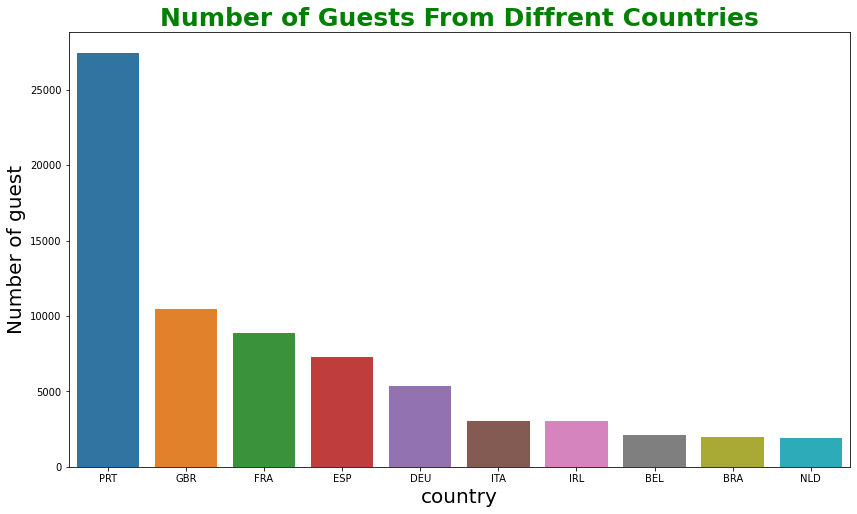

In [ ]:
df_country = df1['country'].value_counts().reset_index().rename(columns={'index':'country', 'country':'guest count'})[:10]
plt.figure(figsize=(14, 8))
sns.barplot(x=df_country['country'], y=df_country['guest count'])
plt.xlabel('country', fontsize = 20)
plt.ylabel('Number of guest', fontsize = 20)
plt.title('Number of Guests From Diffrent Countries', fontsize = 25, fontweight='bold', color='green')

#### **Observation**
####Most of the guests are coming from Portugal i.e. more 25000 guests are from Portugal

**Abbreevations for countries-**

PRT- Portugal

GBR- United Kingdom

FRA- France

ESP- Spain

DEU - Germany

ITA -Italy

IRL - Ireland

BEL -Belgium

BRA -Brazil

NLD-Netherlands

## **12. Which year had the highest bookings?**

In [ ]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

Text(0, 0.5, 'count')

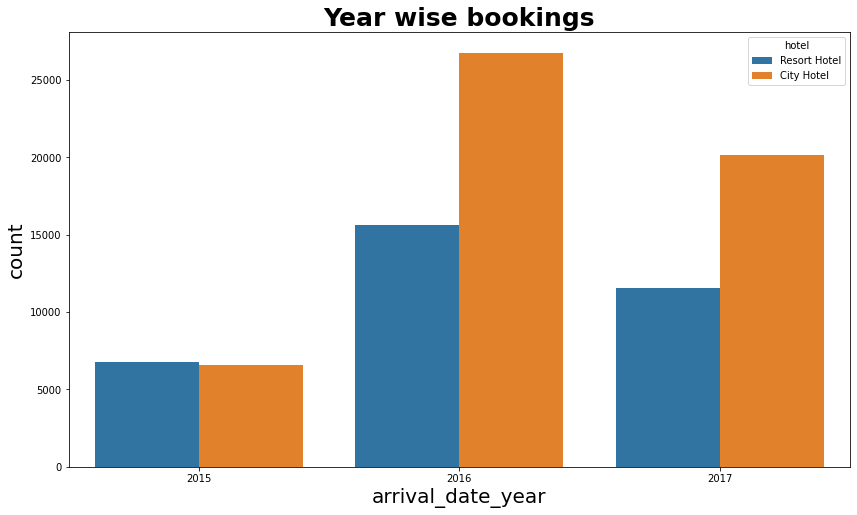

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x=df1['arrival_date_year'], hue=df1['hotel'])
plt.title('Year wise bookings', fontweight='bold', fontsize=25)
plt.xlabel('arrival_date_year', fontsize=20)
plt.ylabel('count', fontsize=20)

#### **Observation**
2016 had the highest bookings.

2015 had less bookings.

#### City hotels had the most of the bookings.

## **13. Which Distribution channel is mostly used for hotel bookings?**

In [ ]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

Text(0, 0.5, 'distribution_channel')

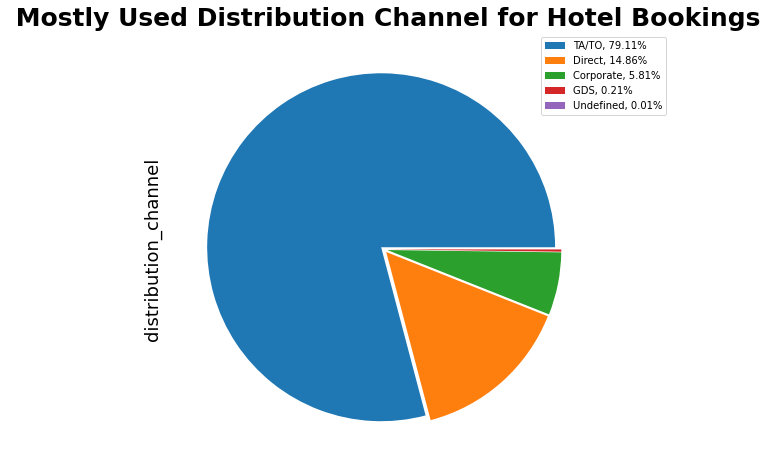

In [ ]:
label=df1['distribution_channel'].value_counts().index.tolist()

distribution_channel_df=df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df1.shape[0],2)

sizes=distribution_channel_df['percentage'].values.tolist()
df1['distribution_channel'].value_counts().plot.pie(explode=[0.02, 0.02,0.02,0.02,0.02], shadow=False, figsize=(18,8),fontsize=10,labels=None)   

label = [f'{l}, {s}%' for l, s in zip(label, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=label)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings', fontsize=25, fontweight='bold')
plt.ylabel('distribution_channel', fontsize=18)

#### **Observation:**
####'TA/TO' is mostly(79.11%) used for booking hoetls

## **14. In which month most of the bookings happened?**

Text(0, 0.5, 'count')

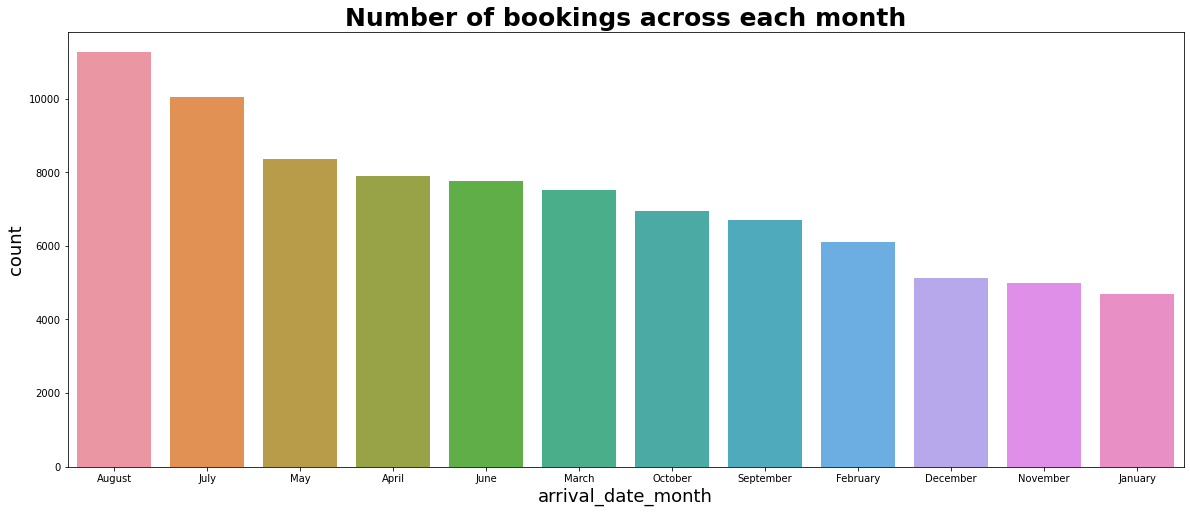

In [ ]:
#Visualization through barplot
month_df = df1['arrival_date_month'].value_counts().reset_index().rename(columns={'index':'arrival_date_month', 'arrival_date_month': 'counts'})
plt.figure(figsize=(20, 8))
sns.barplot(x=month_df['arrival_date_month'], y=month_df['counts'])
plt.title('Number of bookings across each month', fontweight='bold', fontsize=25)
plt.xlabel('arrival_date_month', fontsize=18)
plt.ylabel('count', fontsize=18)

In [ ]:
bookings_by_months = df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':'counts'})

#arrival_date_months is not in proper month order so we create a list of month in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#creating a dataframe so we can map above month list without changing its order
bookings_by_months['arrival_date_month']=pd.Categorical(bookings_by_months['arrival_date_month'], categories=months, ordered=True)

#sorting by arrival_date_month
bookings_by_months = bookings_by_months.sort_values('arrival_date_month')
bookings_by_months

,arrival_date_month,counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


Text(0, 0.5, 'cont')

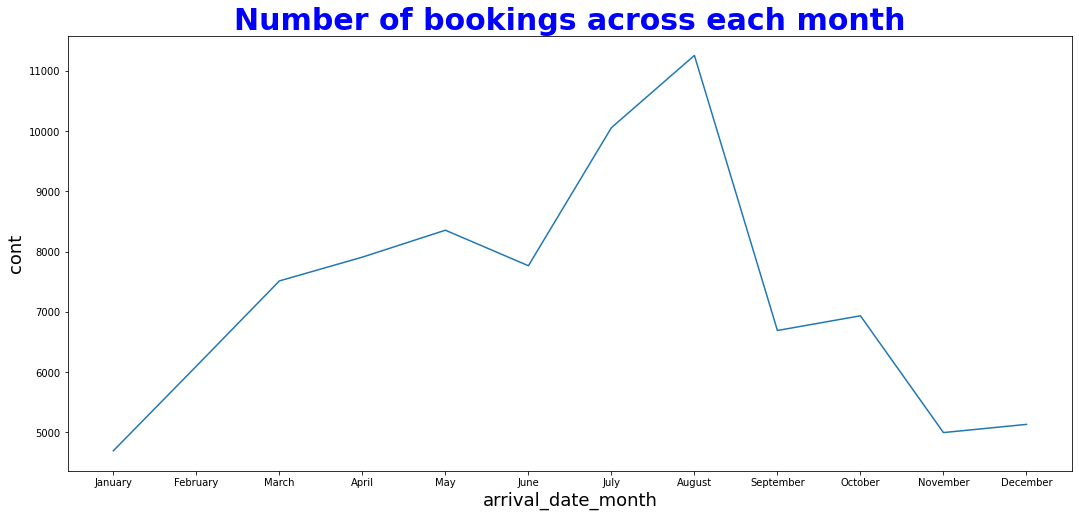

In [ ]:
#Visualization through Lineplot
plt.figure(figsize=(18, 8))
sns.lineplot(x=bookings_by_months['arrival_date_month'], y=bookings_by_months['counts'])
plt.title('Number of bookings across each month', fontweight='bold', fontsize=30, color='blue')
plt.xlabel('arrival_date_month', fontsize=18)
plt.ylabel('cont', fontsize=18)

#### **Observation**
####July and August months had the most Bookings. Summer vacation can be the reason for the bookings.

## **15. Which is the most preferred room type by the customers?**

In [ ]:
df1['assigned_room_type'].value_counts().index

Index(['A', 'D', 'E', 'F', 'G', 'C', 'B', 'H', 'I', 'K', 'P', 'L'], dtype='object')

Text(0.5, 1.0, 'Most Preffered Room Type')

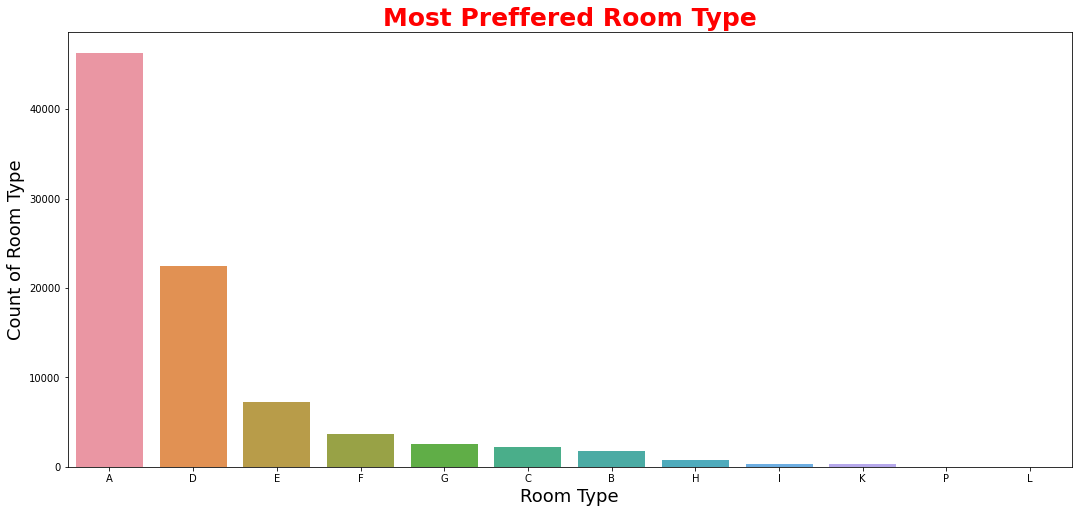

In [ ]:
plt.figure(figsize=(18, 8))
sns.countplot(x=df1['assigned_room_type'],  order=df1['assigned_room_type'].value_counts().index)
plt.xlabel('Room Type', fontsize=18)
plt.ylabel('Count of Room Type', fontsize=18)
plt.title('Most Preffered Room Type', fontsize=25, fontweight='bold', color='red')

#### **Observation**
####The most preferred Room type is "A".

# **Bivariate and Multivariate Analysis**

## **1. Highest Percent Cancellation according to Hotels**

In [ ]:
cancelled_data = df1[df['is_canceled']==1].groupby('hotel').size().reset_index().rename(columns={0 : 'No_of_Booking_Cancelled'})
cancelled_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,No_of_Booking_Cancelled
0,City Hotel,16049
1,Resort Hotel,7976


In [ ]:
# adding Total Booking column For calculate percentage

cancelled_data['Total_booking'] = df1.groupby('hotel').size().reset_index().drop('hotel', axis=1)
cancelled_data

,hotel,No_of_Booking_Cancelled,Total_booking
0,City Hotel,16049,53428
1,Resort Hotel,7976,33968


Text(0.5, 1.0, 'Percentage of Booking Cancellation')

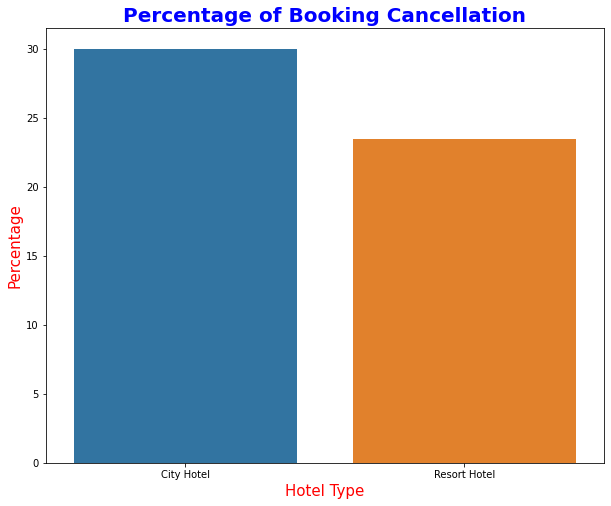

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x = cancelled_data['hotel'], y = cancelled_data['No_of_Booking_Cancelled'] * 100 / cancelled_data['Total_booking'])
plt.xlabel('Hotel Type', fontsize = 15, color = 'red')
plt.ylabel('Percentage', fontsize = 15, color= 'red')
plt.title('Percentage of Booking Cancellation', fontsize=20, color='blue', fontweight='bold')

#### **Observation**
#### City Hotel has highest percentage of cancellation which is almost 30%

## **2. Which Hotel type has the highest ADR?**

Text(0.5, 1.0, 'Avg ADR of each Hotel type')

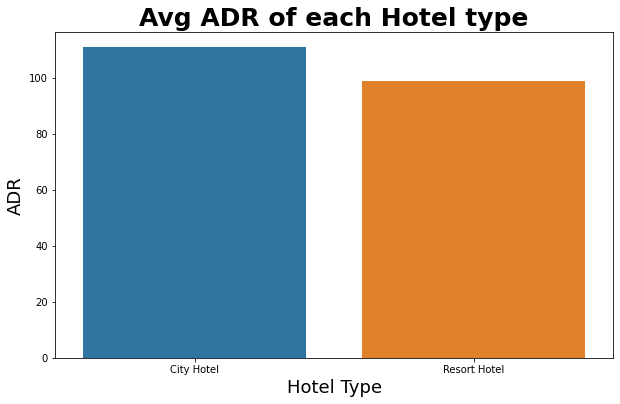

In [ ]:
# adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

df_adr = df1.groupby('hotel')['adr'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=df_adr['hotel'], y=df_adr['adr'])
plt.xlabel('Hotel Type', fontsize=18)
plt.ylabel('ADR', fontsize=18)
plt.title('Avg ADR of each Hotel type', fontsize=25, fontweight='bold')

####**Observation**
####City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

## **3. Which hotel type has the more lead time?**

Text(0.5, 1.0, 'Avg Lead Time for each Hotel Type')

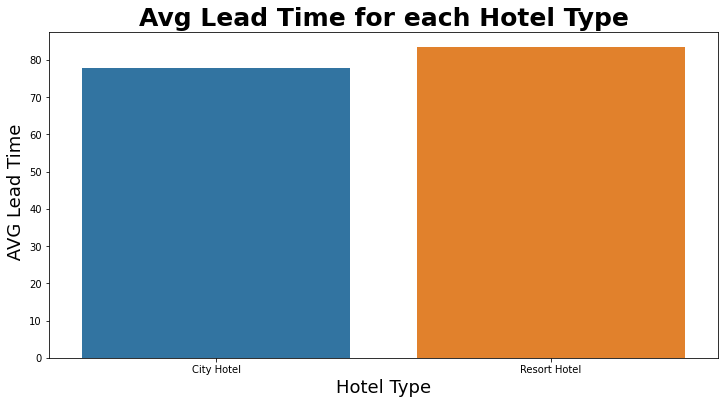

In [ ]:
df_avg_lead_time = df1.groupby('hotel')['lead_time'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x=df_avg_lead_time['hotel'], y=df_avg_lead_time['lead_time'])
plt.xlabel('Hotel Type', fontsize=18)
plt.ylabel(' AVG Lead Time', fontsize=18)
plt.title('Avg Lead Time for each Hotel Type', fontsize=25, fontweight='bold')

#### **Observation**
####Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

## **4. Which Hotels has the most repeated guests?**

Text(0.5, 1.0, 'Most Repeated guest for each Hotel Type')

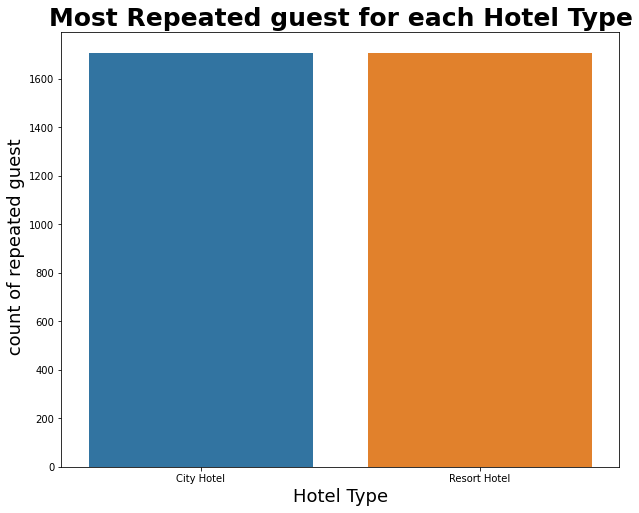

In [ ]:
#repeated guest = 1
#not repeated guest = 0
repeated_guest =df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repeated_guest'})

plt.figure(figsize=(10, 8))
sns.barplot(x=repeated_guest['hotel'], y=repeated_guest['number_of_repeated_guest'])
plt.xlabel('Hotel Type', fontsize=18)
plt.ylabel(' count of repeated guest', fontsize=18)
plt.title('Most Repeated guest for each Hotel Type', fontsize=25, fontweight='bold')

#### **Observation**
####The repeated guest is almost similar for both hotels.

## **5. Which hotel has longer waiting time?**

Text(0.5, 1.0, 'Waiting Time for each Hotel Type')

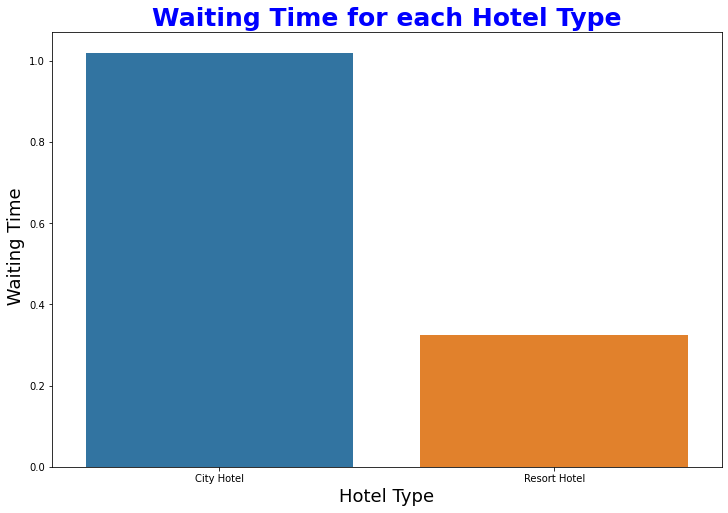

In [ ]:
waiting_time = df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=waiting_time['hotel'], y=waiting_time['days_in_waiting_list'])
plt.xlabel('Hotel Type', fontsize=18)
plt.ylabel(' Waiting Time', fontsize=18)
plt.title('Waiting Time for each Hotel Type', fontsize=25, fontweight='bold', color='blue')

#### **Observation**
####So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

## **6. Which month has the highest ADR?**

In [ ]:
booking_by_month = df1.groupby(['arrival_date_month', 'hotel'])['adr'].mean().reset_index()

#creating month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# it will take the order of the month list in the dataframe along with values
booking_by_month['arrival_date_month'] = pd.Categorical(booking_by_month['arrival_date_month'], categories=months, ordered=True)

#sortting according to months in order
booking_by_month = booking_by_month.sort_values('arrival_date_month')
booking_by_month

,arrival_date_month,hotel,adr
8,January,City Hotel,85.092612
9,January,Resort Hotel,49.131584
6,February,City Hotel,88.945304
7,February,Resort Hotel,54.081107
15,March,Resort Hotel,57.569213
14,March,City Hotel,94.763375
0,April,City Hotel,117.156250
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,127.851240


Text(0, 0.5, 'ADR')

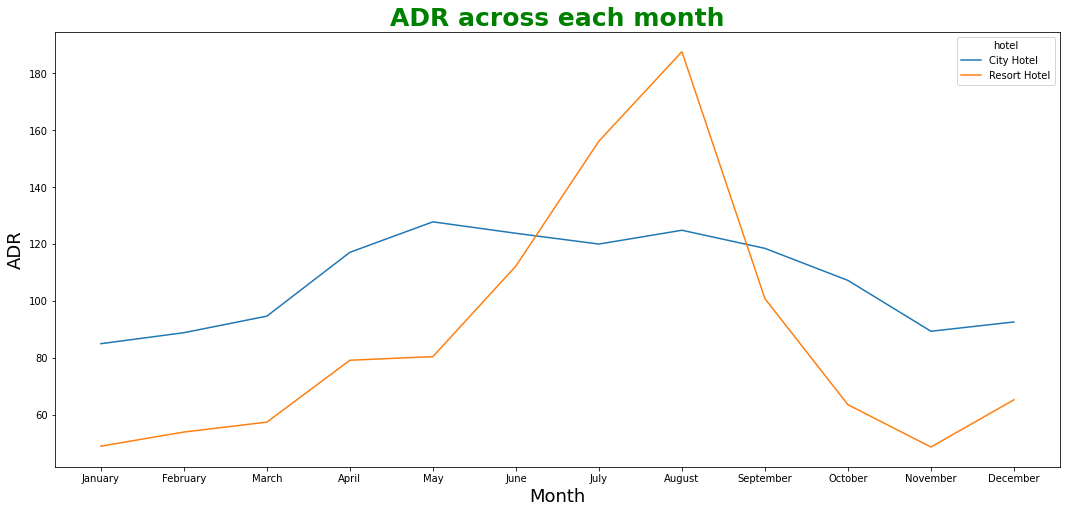

In [ ]:
# Visualization by lineplot

plt.figure(figsize=(18,8))

sns.lineplot(x=booking_by_month['arrival_date_month'],y=booking_by_month['adr'],hue=booking_by_month['hotel'])

plt.title('ADR across each month', fontsize=25, fontweight='bold', color='green')
plt.xlabel('Month', fontsize=18)
plt.ylabel('ADR', fontsize=18)

#### **Observation**
####For Resort hotel ADR is high in the months June, July, August as compared to City Hotels. May be Customers/People wants to spend their Summer vacation in Resorts Hotels.

####The best time for guests to visit Resort or City hotels is January, February, March, April, October, November and December as the average daily rate in this month is very low.

## **7. Which distribution channel contributed more to adr in order to increase the the income?**

Text(0, 0.5, 'ADR')

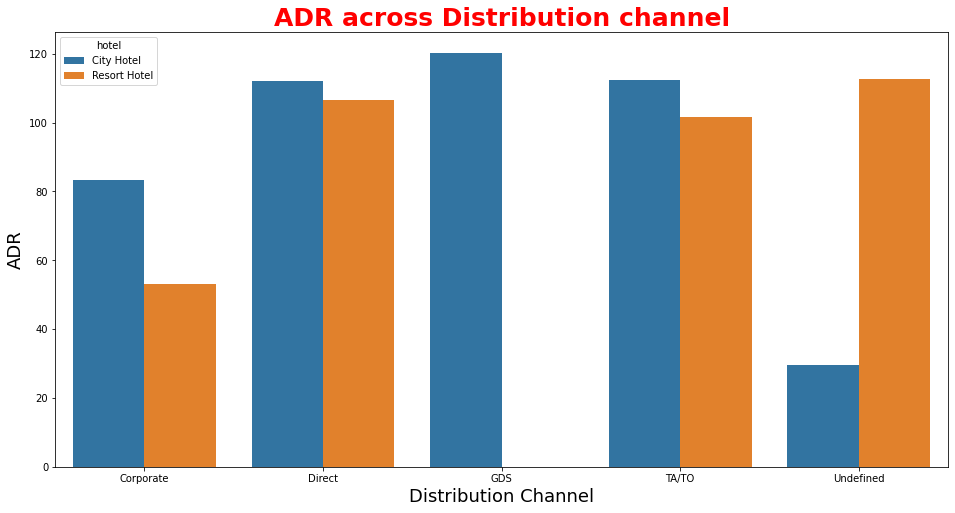

In [ ]:
distrb_channel = df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

plt.figure(figsize=(16,8))

sns.barplot(x='distribution_channel', y='adr', data=distrb_channel, hue='hotel')

plt.title('ADR across Distribution channel', fontsize=25, fontweight='bold', color='red')
plt.xlabel('Distribution Channel', fontsize=18)
plt.ylabel('ADR', fontsize=18)



* Corporate- These are corporate hotel booing companies which makes bookings possible.
* GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
* Direct- means that bookings are directly made with the respective hotels
* TA/TO- means that booings are made through travel agents or travel operators.
* Undefined- Bookings are undefined. may be customers made their bookings on arrival.

#### **Observation**
**From the plot is clear that**
####'Direct' and 'TA/TO' has almost equally contributed in adr in both type of hotels i.e. 'City Hotel' and 'Resort Hotel'.
####GDS has highly contributed in adr in 'City Hotel' type.
####GDS needs to increase Resort Hotel bookings.



## **8. Which Market Segment has the higest cancellation rate?**

In [ ]:
mkt_sgm_df = df1[df['is_canceled']==1]
mkt_sgm_df = mkt_sgm_df.groupby(['market_segment', 'hotel']).size().reset_index().rename(columns={0 : 'count'})
mkt_sgm_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,market_segment,hotel,count
0,Aviation,City Hotel,45
1,Complementary,City Hotel,57
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,264
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,890
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1261


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

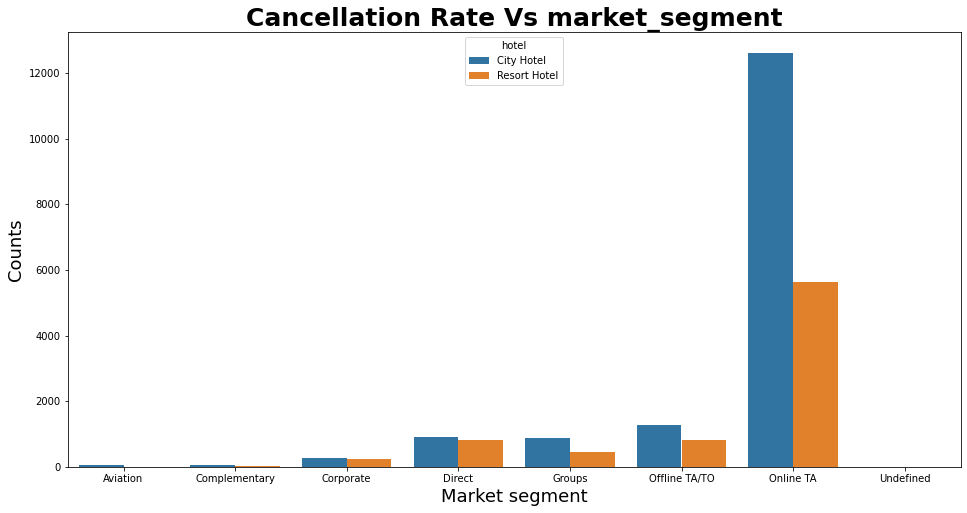

In [ ]:
plt.figure(figsize=(16,8))

sns.barplot(x='market_segment',y='count',hue='hotel',data= mkt_sgm_df)

plt.xlabel('Market segment', fontsize=18)
plt.ylabel('Counts', fontsize=18)
plt.title('Cancellation Rate Vs market_segment', fontsize=25, fontweight='bold')


#### **Observation**
####'Online T/A' has the highest cancellation in both type of Hotel
####In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies

## **9. Which distribution channel has the higest cancellation rate?**

In [ ]:
cancelled_dfm = df1[df['is_canceled']==1]
cancelled_dfm = cancelled_dfm.groupby(['distribution_channel', 'hotel']).size().reset_index().rename(columns={0: 'count'})
cancelled_dfm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,distribution_channel,hotel,count
0,Corporate,City Hotel,332
1,Corporate,Resort Hotel,316
2,Direct,City Hotel,973
3,Direct,Resort Hotel,952
4,GDS,City Hotel,36
5,TA/TO,City Hotel,14704
6,TA/TO,Resort Hotel,6708
7,Undefined,City Hotel,4


Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

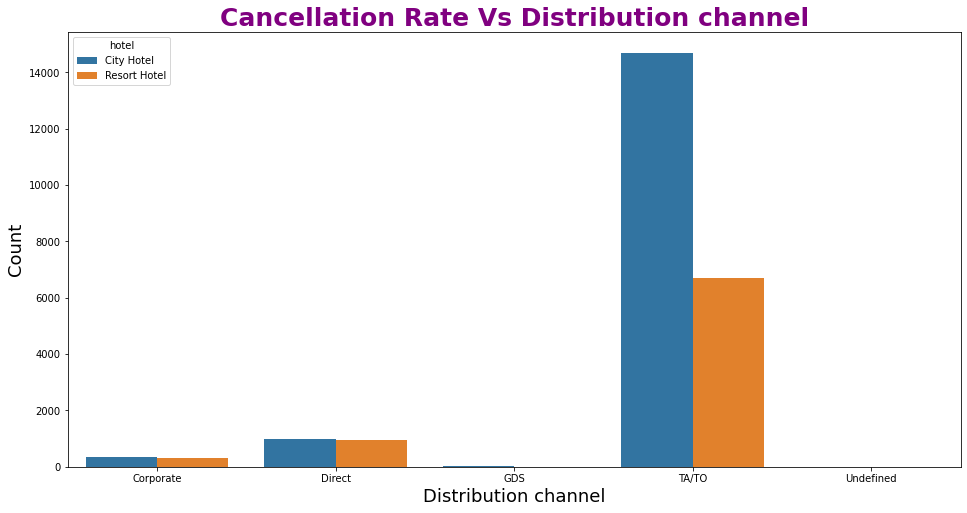

In [ ]:
plt.figure(figsize=(16, 8))
sns.barplot(x = 'distribution_channel', y= 'count', hue = 'hotel', data = cancelled_dfm)
plt.xlabel('Distribution channel', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.title('Cancellation Rate Vs Distribution channel', fontsize=25, fontweight='bold', color='purple')

#### **Observation**
####In "TA/TO", City hotels has the high cancellation rate compared to resort hotels.
####In "direct" both the hotels has almost same cancellation rate.

## **10. Does the guests alloted with the same room type which was reserved by them?**

In [ ]:
# Define a function for the reserved room type is same  or not as  assigned room type

def same_room_allotment(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

'''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

'function to check whether the reserved room \n  type is same  or not as  assigned room type'

In [ ]:
# create new column to df1
df1['is_same_room_alloted'] = df1.apply(lambda x : same_room_allotment(x), axis=1)

# create new_df and calculate  percentage of same room alloted  or not
new_df2 =pd.DataFrame(df1.groupby('is_canceled')['is_same_room_alloted'].sum()*100 / df1.groupby('is_canceled').size()).rename(columns={0:'percentage'})
new_df2

,percentage
is_canceled,
Cancelled,2.568158
Not Cancelled,19.712487


Text(0, 0.5, '% of not getting same room as per reservation')

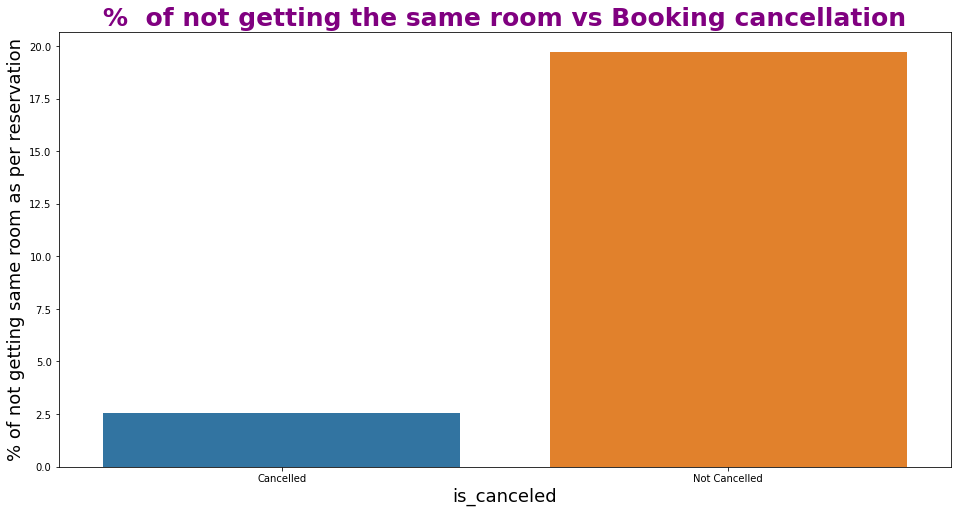

In [ ]:
plt.figure(figsize=(16,8))

sns.barplot(x=new_df2.index,y=new_df2['percentage'])

plt.title('%  of not getting the same room vs Booking cancellation', fontsize=25, fontweight='bold', color='purple')
plt.xlabel('is_canceled', fontsize=18)
plt.ylabel('% of not getting same room as per reservation', fontsize=18)

#### **Obseravtion**
####Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

## **11. ADR across different market segment**

Text(0, 0.5, 'ADR')

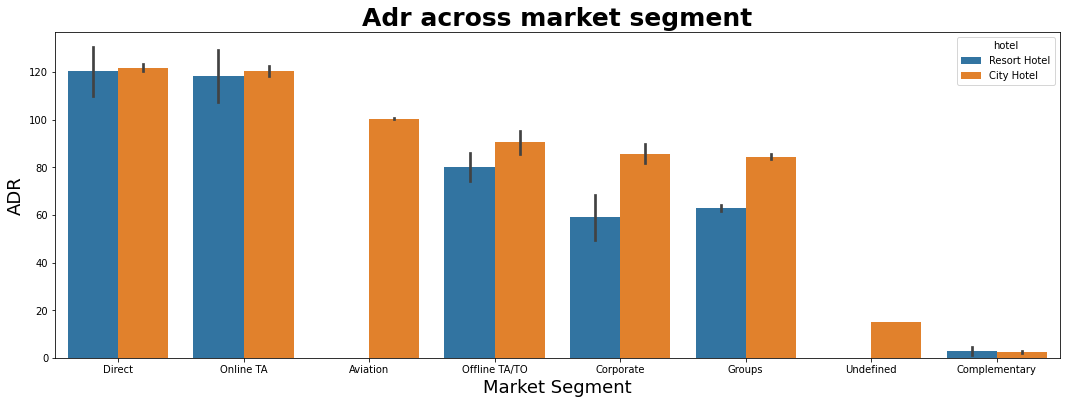

In [ ]:
df_grupby = df1.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()  

plt.figure(figsize=(18,6))

sns.barplot(x='market_segment',y='adr',hue='hotel',data=df_grupby.sort_values(by='adr',ascending=False))

plt.title('Adr across market segment', fontsize=25, fontweight='bold')
plt.xlabel('Market Segment', fontsize=18)
plt.ylabel('ADR', fontsize=18)

#### **Obseravtion**
####'Direct' and 'Online TA' are contributing the most in both types of hotels.
####Aviation segment should focus on increasing the bookings of 'City Hotel'

## **12. What is the Optimal stay length in both types of hotels ?**

In [ ]:
# adding new column of total_stay 
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights'] 

In [ ]:
df1.groupby(['total_stay', 'hotel']).agg('count').reset_index()

,total_stay,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_same_room_alloted
0,0,City Hotel,288,288,288,288,288,288,288,288,...,288,288,288,288,288,288,288,288,288,288
1,0,Resort Hotel,363,363,363,363,363,363,363,363,...,363,363,363,363,363,363,363,363,363,363
2,1,City Hotel,10284,10284,10284,10284,10284,10284,10284,10284,...,10284,10284,10284,10284,10284,10284,10284,10284,10284,10284
3,1,Resort Hotel,6900,6900,6900,6900,6900,6900,6900,6900,...,6900,6900,6900,6900,6900,6900,6900,6900,6900,6900
4,2,City Hotel,10824,10824,10824,10824,10824,10824,10824,10824,...,10824,10824,10824,10824,10824,10824,10824,10824,10824,10824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,49,City Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
72,56,Resort Hotel,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
73,57,City Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
74,60,Resort Hotel,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Text(0.5, 0, 'total_stay(days)')

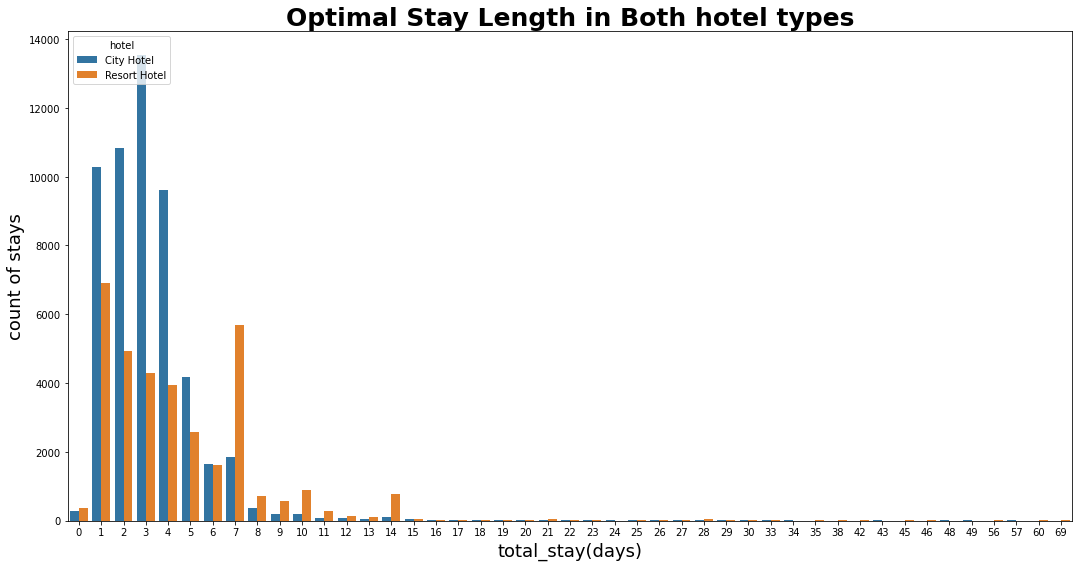

In [ ]:
stay = df1.groupby(['total_stay', 'hotel']).agg('count').reset_index()   # group by total stay and hotel
stay = stay.iloc[:, :3]                                                   # take 1st 3 columns
stay = stay.rename(columns={'is_canceled':'Number of stays'})    # rename the columns


plt.figure(figsize=(18,9))
sns.barplot(x='total_stay',y='Number of stays',hue='hotel',data=stay)

#set labels
plt.title('Optimal Stay Length in Both hotel types', fontsize=25, fontweight='bold')
plt.ylabel('count of stays', fontsize=18)
plt.xlabel('total_stay(days)', fontsize=18)

#### **Observation:**
####Optimal stay in both the type hotel is less than 7 days.

## **13. Relationship between ADR and total stay.**

In [ ]:
df_adr_vs_stay = df1.groupby(['total_stay', 'adr','hotel']).agg('count').reset_index()
df_adr_vs_stay = df_adr_vs_stay.iloc[:, :3]
df_adr_vs_stay = df_adr_vs_stay.rename(columns={'is_canceled':'Number of stays'})
df_adr_vs_stay = df_adr_vs_stay[:18000]
df_adr_vs_stay

,total_stay,adr,hotel
0,0,0.00,City Hotel
1,0,0.00,Resort Hotel
2,1,0.00,City Hotel
3,1,0.00,Resort Hotel
4,1,1.00,City Hotel
...,...,...,...
17995,7,210.86,Resort Hotel
17996,7,211.00,Resort Hotel
17997,7,211.03,Resort Hotel
17998,7,211.16,Resort Hotel


Text(0, 0.5, 'ADR')

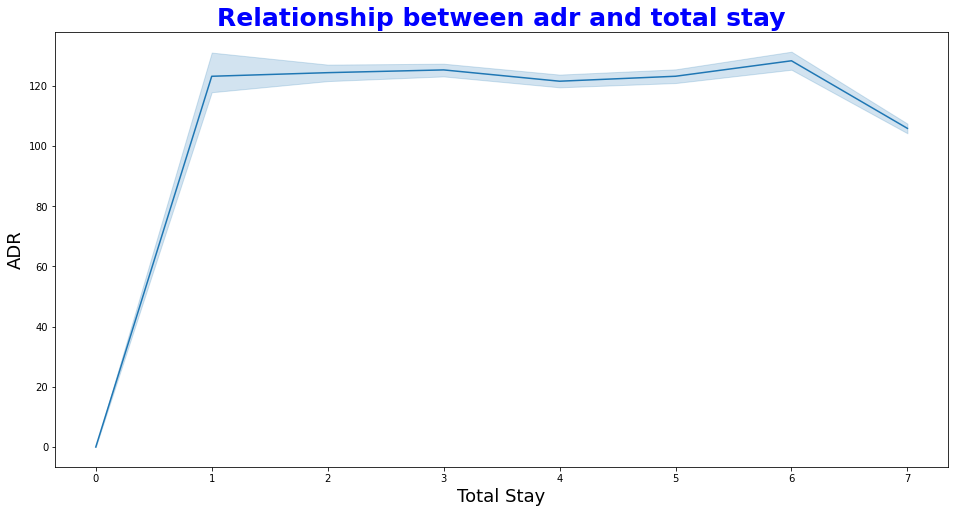

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='total_stay',y='adr',data = df_adr_vs_stay)
plt.title('Relationship between adr and total stay', fontsize=25, fontweight='bold', color='blue')
plt.xlabel('Total Stay', fontsize=18)
plt.ylabel('ADR', fontsize=18)

#### **Observation:**
#### As the total stay increases the adr also increases.

## **14. Correlation of the columns**

Text(0.5, 1.0, 'co-relation of the columns')

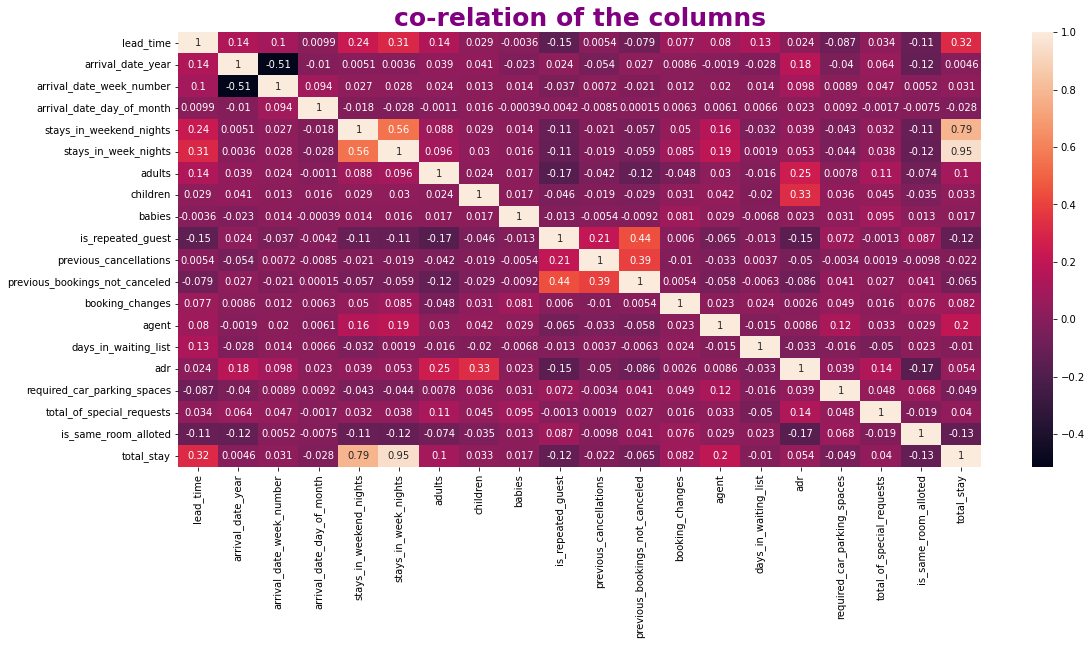

In [ ]:
plt.figure(figsize=(18, 8))
sns.heatmap(df1.corr(), annot=True)
plt.title('co-relation of the columns', fontsize=25, fontweight='bold', color='purple')

* is_canceled and same_room_alloted_or_not are negatively correlated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
* lead_time and total_stay is positively correlated.That means more is the stay of customer more will be the lead time.
* adults,childrens and babies are correlated to each other. That means more the people more will be adr.
* is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.

## **15. Relationship between the repeated guests and previous bookings not canceled?**

In [ ]:
repeated_guests_yes = df1[df1['is_repeated_guest']==1]
repeated_guests_no = df1[df1['is_repeated_guest']==0]

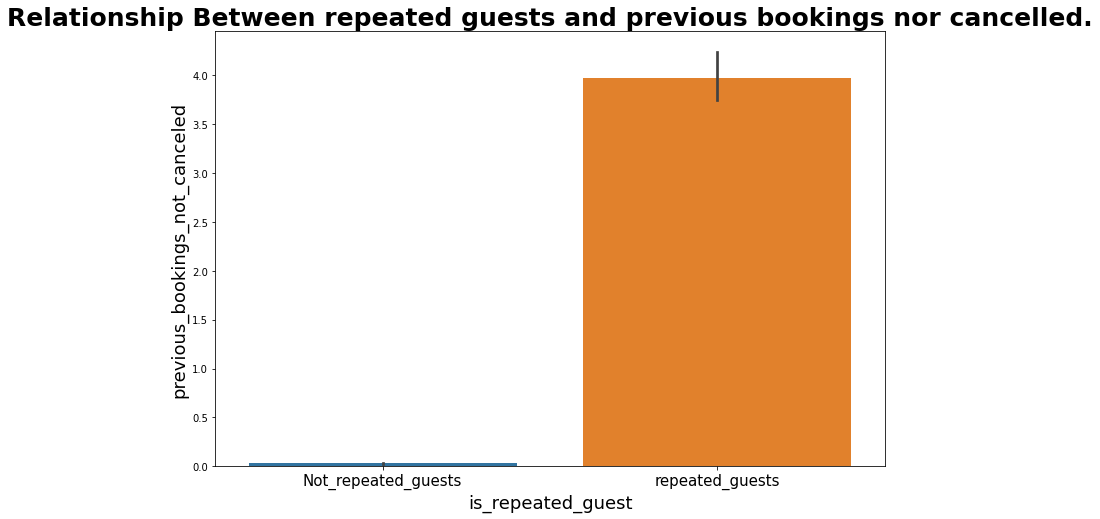

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.', fontsize=25, fontweight='bold')
plt.xlabel('is_repeated_guest', fontsize=18)
plt.ylabel('previous_bookings_not_canceled', fontsize=18)
plt.show()

#### **Observation**
####Not Repeated guests are more likely to cancel their bookings.

## **16. ADR relationship with total number of people**

In [ ]:
# adding new column of total_people
df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']

Text(0, 0.5, 'ADR')

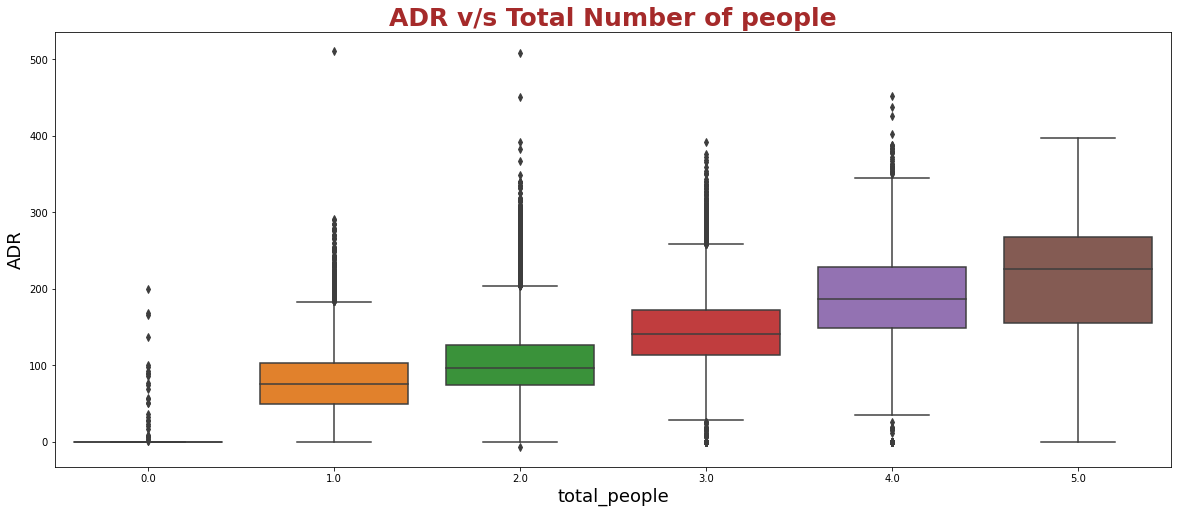

In [ ]:
plt.figure(figsize=(20,8))
new3_df3 = df1[df1['total_people'] <=5]
# new_df2.head()

sns.boxplot(x=new3_df3['total_people'], y= new3_df3 ['adr'])

# set lables
plt.title('ADR v/s Total Number of people', fontsize=25, fontweight='bold', color='brown')
plt.xlabel('total_people', fontsize=18)
plt.ylabel('ADR', fontsize=18)

#### **observation**
####As the total number of people increases adr also increases.
####Thus adr and total people are directly proportional to each other.

## **17.  Relationship between adr and total stay**

Text(0, 0.5, 'ADR')

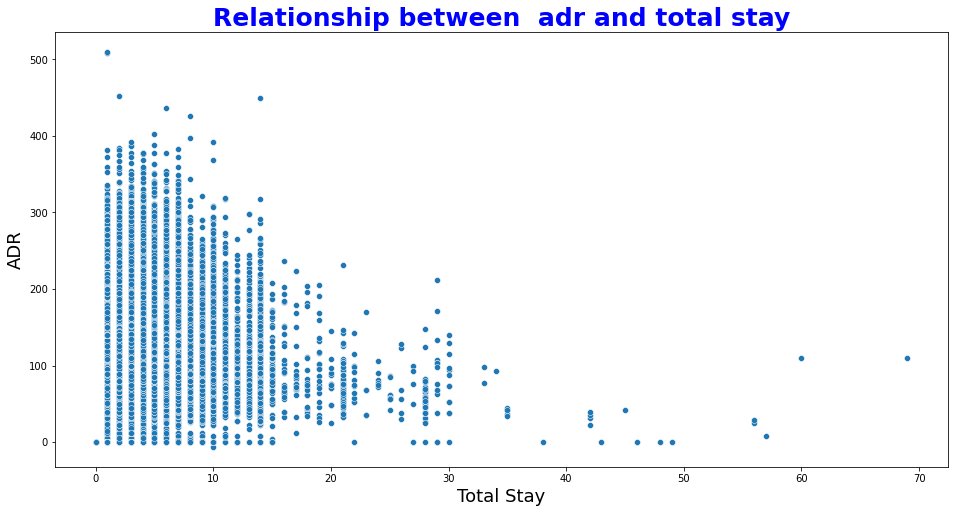

In [ ]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)
plt.figure(figsize=(16,8))
sns.scatterplot(x=df1['total_stay'],y=df1['adr'])
plt.title('Relationship between  adr and total stay', fontsize=25, fontweight='bold', color='blue')
plt.xlabel('Total Stay', fontsize=18)
plt.ylabel('ADR', fontsize=18)

#### **observation**
####From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

# **Conclusions:**

* City hotels are the most preferred hotel type by the guests. We can say City 
hotel is the busiest hotel.
* 27.5 % bookings were got cancelled out of all the bookings.
* Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
* The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.
* Most of the customers (91.6%) do not require car parking spaces.
* 79.1 % bookings were made through TA/TO (travel agents/Tour operators).
* BB( Bed & Breakfast) is the most preferred type of meal by the guests.
* Maximum number of guests were from Portugal, i.e. more than 25000 guests.
* Most of the bookings for City hotels and Resort hotel were happened in 2016.
* Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
* Booking cancellation rate is high for City hotels which almost 30 %.
* Average lead time for resort hotel is high.
* Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
* Resort hotels have the most repeated guests.
* Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
* Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.